In [10]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import os
from dask import bag

In [2]:
uptrend_dir = r"D:\Capstone Projects\StockerLens\data\raw\chart trend dataset\uptrend"
downtrend_dir = r"D:\Capstone Projects\StockerLens\data\raw\chart trend dataset\downtrend"


In [8]:
number_classes = {
    'Uptrend': len(os.listdir(uptrend_dir)),
    'Downtrend': len(os.listdir(downtrend_dir))
}

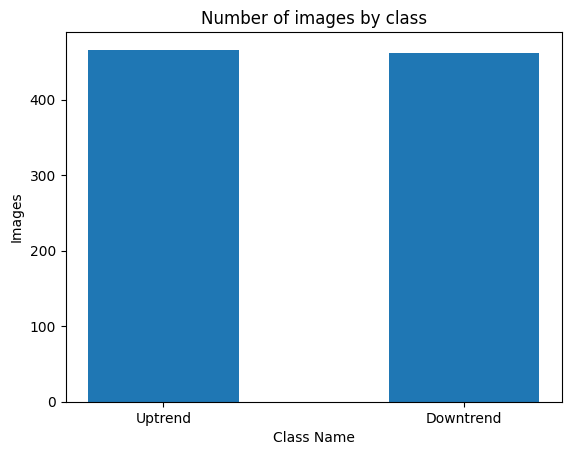

In [9]:
plt.bar(number_classes.keys(), number_classes.values(), width=0.5)
plt.title("Number of images by class")
plt.xlabel("Class Name")
plt.ylabel("Images")
plt.show()

### Insights

classes are balanced, each class have above 450 images

In [3]:
directories = {
    "Uptrend": uptrend_dir,
    "Downtrend": downtrend_dir
}


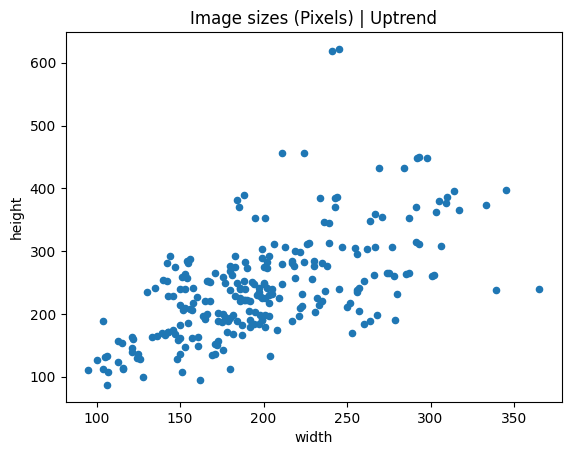

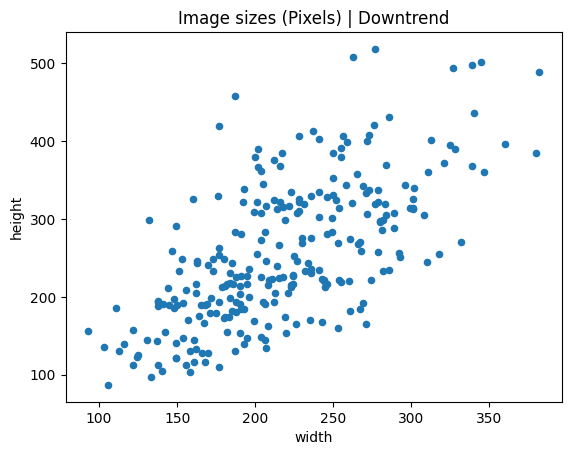

In [37]:
def get_dims(file_path):
    img = cv2.imread(file_path)
    return img.shape[:2]


for n, d in directories.items():
    file_path = d
    filelist = [os.path.join(file_path, f) for f in os.listdir(file_path)]
    
    dims = bag.from_sequence(filelist).map(get_dims).filter(lambda x: x is not None)
    dims = dims.compute()
    
    dim_df = pd.DataFrame(dims, columns=['width', 'height'])
    sizes = dim_df.groupby(['width', 'height']).size().reset_index().rename(columns={0: 'count'})
    
    sizes.plot.scatter(x='width', y='height')
    plt.title(f"Image sizes (Pixels) | {n}")

plt.show()


### Insights

images have various kind of pixel sizes

In [69]:
uptrend_list = [os.path.join(uptrend_dir, f) for f in os.listdir(uptrend_dir)]
downtrend_list = [os.path.join(downtrend_dir, f) for f in os.listdir(downtrend_dir)]

ValueError: Single argument to subplot must be a three-digit integer, not <matplotlib.image.AxesImage object at 0x00000177175C5A00>

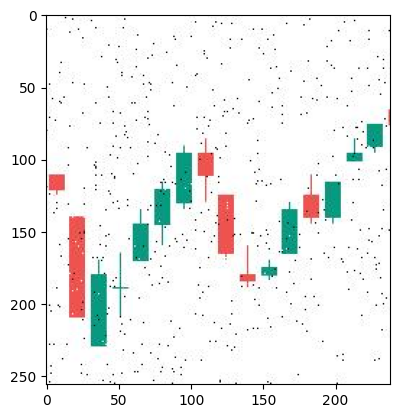

In [ ]:
for i in range(4):
    img = cv2.imread(uptrend_list[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img = cv2.imread(downtrend_list[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

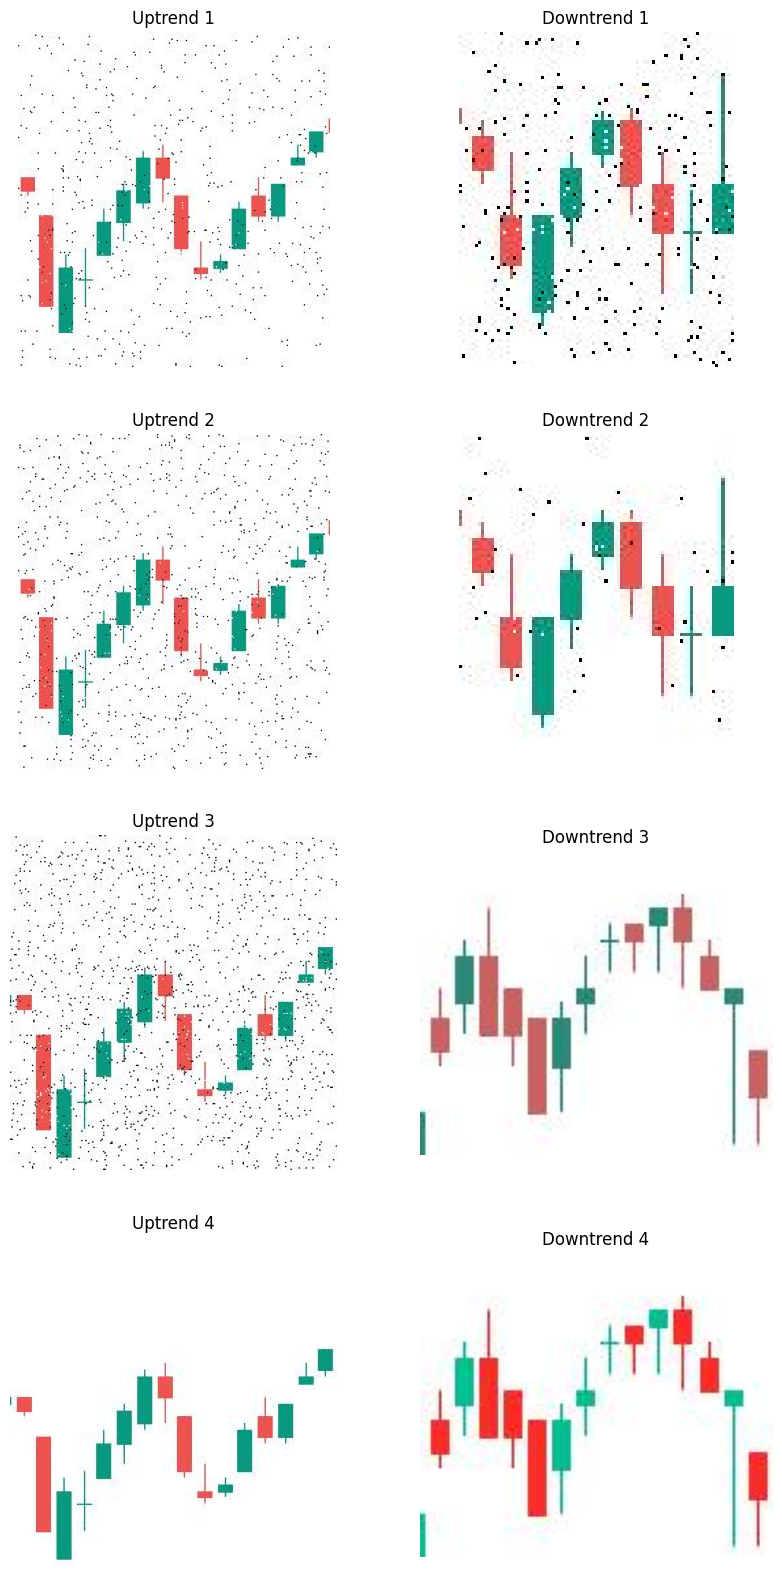

In [75]:
plt.figure(figsize=(10, 20))
for i in range(4):
    # Read and display uptrend image
    img_up = cv2.imread(uptrend_list[i])
    img_up = cv2.cvtColor(img_up, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 2, 2 * i + 1)  # Position in subplot (left column)
    plt.imshow(img_up)
    plt.title(f'Uptrend {i+1}')
    plt.axis('off')

    # Read and display downtrend image
    img_down = cv2.imread(downtrend_list[i])
    img_down = cv2.cvtColor(img_down, cv2.COLOR_BGR2RGB)
    plt.subplot(4, 2, 2 * i + 2)  # Position in subplot (right column)
    plt.imshow(img_down)
    plt.title(f'Downtrend {i+1}')
    plt.axis('off')

plt.show()